In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import scienceplots
plt.style.use(['science', 'notebook','grid'])
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



In [2]:
df_DM = pd.read_csv('quint.csv', header=None, names=['M', 'v1', 'v2', 'v3', 'v4', 'v5'])
df_DM

,M,v1,v2,v3,v4,v5
0,9000,2.228909e-26,5.239117e-25,6.217306e-26,1.119892e-24,3.000000e-26
1,9001,2.228509e-26,5.237971e-25,6.215925e-26,1.119643e-24,3.000000e-26
2,9002,2.228109e-26,5.236825e-25,6.214544e-26,1.119394e-24,3.000000e-26
3,9003,2.227709e-26,5.235678e-25,6.213164e-26,1.119146e-24,3.000000e-26
4,9004,2.227308e-26,5.234532e-25,6.211783e-26,1.118897e-24,3.000000e-26
...,...,...,...,...,...,...
90996,99996,1.621512e-28,1.406871e-27,5.037297e-28,9.071910e-27,3.000000e-26
90997,99997,1.621377e-28,1.406874e-27,5.037196e-28,9.071728e-27,3.000000e-26
90998,99998,1.621241e-28,1.406877e-27,5.037096e-28,9.071547e-27,3.000000e-26
90999,99999,1.621105e-28,1.406880e-27,5.036995e-28,9.071365e-27,3.000000e-26


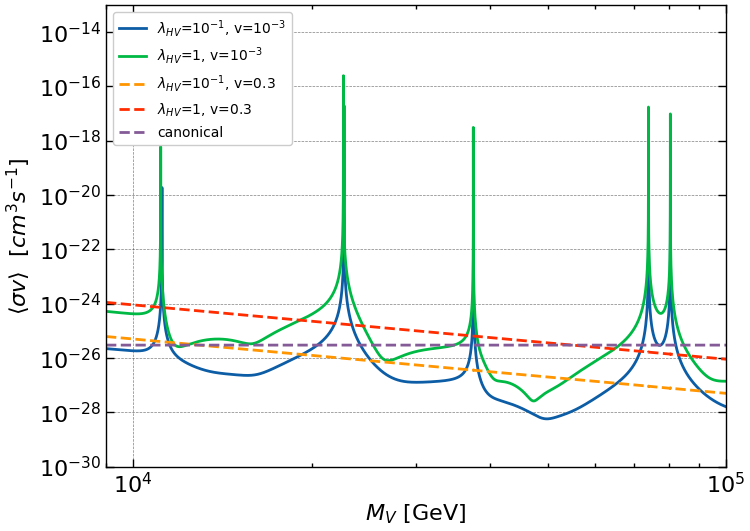

In [3]:
# Graficar los datos
plt.loglog(df_DM['M'], df_DM['v1'], label=r'$\lambda_{HV}$=$10^{-1}$, v=$10^{-3}$')
plt.loglog(df_DM['M'], df_DM['v2'], label=r'$\lambda_{HV}$=1, v=$10^{-3}$')
plt.loglog(df_DM['M'], df_DM['v3'], label=r'$\lambda_{HV}$=$10^{-1}$, v=0.3',linestyle='dashed')
plt.loglog(df_DM['M'], df_DM['v4'], label=r'$\lambda_{HV}$=1, v=0.3',linestyle='dashed')
plt.loglog(df_DM['M'], df_DM['v5'], label='canonical', linestyle='dashed')
plt.xlabel(r"$M_V$ [GeV]")
plt.ylabel(r'$\langle\sigma v \rangle$  [$cm^{3}s^{-1}$]')
plt.xlim(9000, 10**5)
plt.ylim(10 ** -30, 10**-13)
plt.legend(fontsize=10)
# plt.title('Sommerleld Enhancement')
plt.savefig("quint1.pdf")
plt.show()

Error cuadrático medio (MSE): 386784432.9466
Coeficiente de determinación (R²): 0.4336


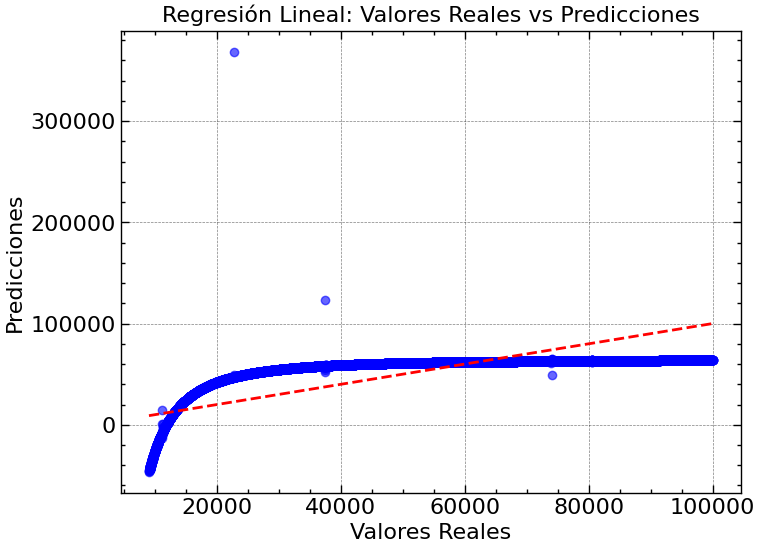

In [4]:
# 1. Variables independientes (features) y dependiente (target)
X = df_DM[['v1', 'v2', 'v3', 'v4', 'v5']]  # Variables independientes
y = df_DM['M']  # Variable dependiente

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear el modelo de regresión lineal
model = LinearRegression()

# 4. Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 6. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

# 7. Visualizar los resultados
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.grid(True)
plt.show()


Separación de datos:

    X: las columnas v1, v2, v3, v4, v5 como características.
    y: la columna M como variable objetivo.

División del conjunto de datos:

    Dividimos el DataFrame en datos de entrenamiento (80%) y de prueba (20%) para evaluar el modelo.

Modelo de regresión lineal:

    Utilizamos LinearRegression de scikit-learn.

Métricas de evaluación:

    MSE: mide el error promedio entre las predicciones y los valores reales.
    R²: indica qué tan bien el modelo explica la variabilidad de los datos.

Visualización:

    Un gráfico de dispersión para comparar los valores reales con las predicciones.

El modelo tiene R^{2} bajo, por lo tanto vamos a usar otros modelos
    

Random Forest - Error cuadrático medio (MSE): 682844399.4525
Random Forest - Coeficiente de determinación (R²): -0.0000


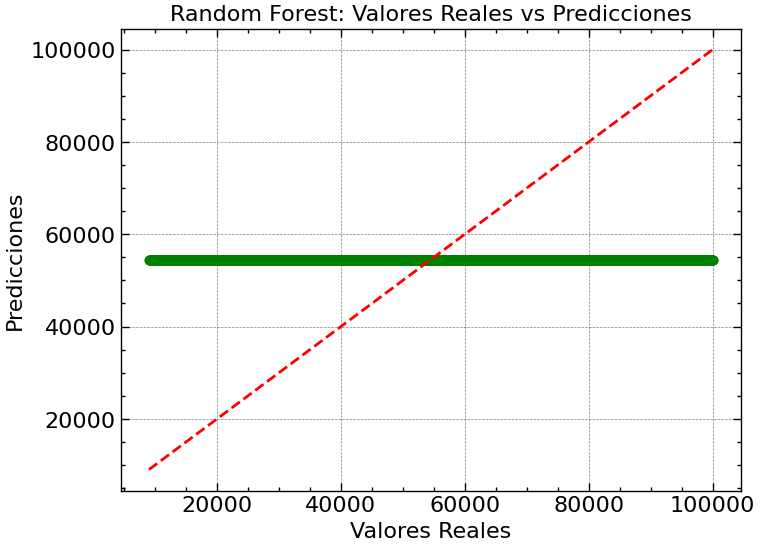

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_y_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Error cuadrático medio (MSE): {rf_mse:.4f}")
print(f"Random Forest - Coeficiente de determinación (R²): {rf_r2:.4f}")

# Visualizar los resultados de Random Forest
plt.scatter(y_test, rf_y_pred, alpha=0.6, color='g')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Random Forest: Valores Reales vs Predicciones')
plt.grid(True)
plt.show()


Gradient Boosting - Error cuadrático medio (MSE): 682843780.7483
Gradient Boosting - Coeficiente de determinación (R²): -0.0000


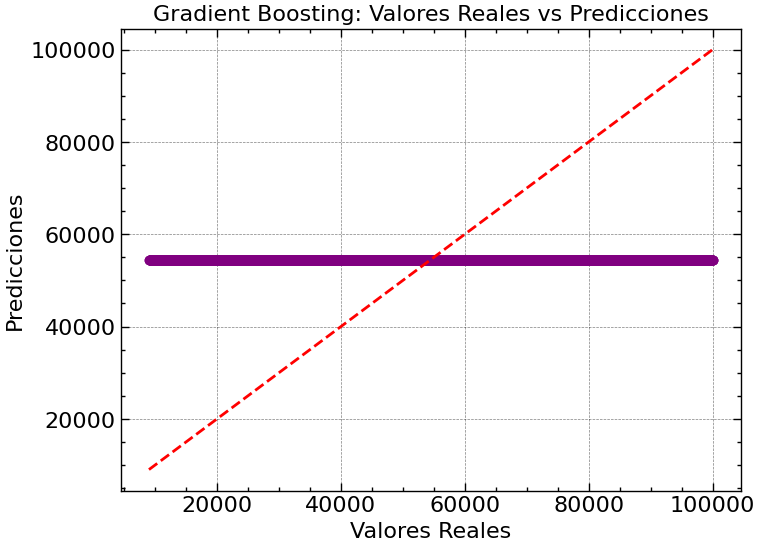

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
gb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
gb_y_pred = gb_model.predict(X_test)

# Evaluar el modelo
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - Error cuadrático medio (MSE): {gb_mse:.4f}")
print(f"Gradient Boosting - Coeficiente de determinación (R²): {gb_r2:.4f}")

# Visualizar los resultados de Gradient Boosting
plt.scatter(y_test, gb_y_pred, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gradient Boosting: Valores Reales vs Predicciones')
plt.grid(True)
plt.show()
